In [216]:
import json
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [217]:
def getPath(section="summary", data_split="train", ent_rel="re"):
    return f"_sci{ent_rel}_models/{section}/{data_split}_{ent_rel}.json"

In [218]:
def print_progress(curr, full, desc='', bar_size=50):    
    bar = int((curr+1)/full*bar_size)
    sys.stdout.write(f"\r{desc}[{'='*bar}{' '*(bar_size-bar)}] {curr+1}/{full}")
    sys.stdout.flush()
    if curr+1==full: print()

# Import data

In [123]:
filepath = getPath("summary", "train")
with open(filepath, 'r') as json_file:
    json_list = list(json_file)
data_ner = [json.loads(json_str) for json_str in json_list]
print(data_ner[0])

{'doc_key': 'SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc', 'sentences': [['This', 'paper', 'investigates', 'kernel', 'ridge', '-', 'less', 'regression', 'from', 'a', 'stability', 'viewpoint', 'by', 'deriving', 'its', 'risk', 'bounds', '.'], ['Using', 'stability', 'arguments', 'to', 'derive', 'risk', 'bounds', 'have', 'been', 'widely', 'adopting', 'in', 'machine', 'learning', '.'], ['However', ',', 'related', 'studies', 'on', 'kernel', 'ridge', '-', 'less', 'regression', 'are', 'still', 'sparse', '.'], ['The', 'present', 'study', 'fills', 'this', 'gap', ',', 'which', ',', 'in', 'my', 'opinion', ',', 'is', 'also', 'one', 'of', 'the', 'main', 'contributions', 'of', 'the', 'present', 'study', '.']], 'ner': [[], [], [], []], 'relations': [[], [], [], []], 'predicted_ner': [[[3, 7, 'Method'], [15, 16, 'OtherScientificTerm']], [[19, 20, 'Method'], [23, 24, 'OtherScientificTerm'], [30, 31, 'Task']], [[38, 42, 'Method']], []], 'predicted_re': [[0, []], [1, [[[19, 20], [23, 24], 'USED-FOR'], [[1

In [124]:
result = data_ner[0]
all_sentences = [j for i in result["sentences"] for j in i]

for idx, sent in enumerate(result["sentences"]):
    print(f"Sentence {idx}: ")
    print(" ".join(sent))
    for pred_ner in result["predicted_ner"][idx]:
        start_idx = pred_ner[0]
        end_idx   = pred_ner[1]+1
        ent       = " ".join(all_sentences[start_idx:end_idx])
        print("\t{: >20}: {: <50}".format(pred_ner[2], ent))
    print()

Sentence 0: 
This paper investigates kernel ridge - less regression from a stability viewpoint by deriving its risk bounds .
	              Method: kernel ridge - less regression                    
	 OtherScientificTerm: risk bounds                                       

Sentence 1: 
Using stability arguments to derive risk bounds have been widely adopting in machine learning .
	              Method: stability arguments                               
	 OtherScientificTerm: risk bounds                                       
	                Task: machine learning                                  

Sentence 2: 
However , related studies on kernel ridge - less regression are still sparse .
	              Method: kernel ridge - less regression                    

Sentence 3: 
The present study fills this gap , which , in my opinion , is also one of the main contributions of the present study .



In [125]:
filepath = FILEPATHS["RE"]["val"]
with open(filepath, 'r') as json_file:
    json_list = list(json_file)
data_len = len(json_list)
data_re = [json.loads(json_str) for json_str in json_list]

In [126]:
result = data_re[2]
print(result)

{'doc_key': 'SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96', 'sentences': [['The', 'paper', 'proposed', 'a', 'differentially', 'private', 'training', 'algorithm', 'for', 'federated', 'learning', '.'], ['The', 'target', 'is', 'to', 'achieve', 'communication', 'reduction', 'while', 'keeping', 'differential', 'privacy', 'during', 'training', '.'], ['The', 'proposed', 'algorithm', 'adds', 'a', 'few', 'new', 'components', 'to', 'SGD', ',', 'including', 'a', 'privacy', 'mechanism', ',', 'a', 'random', 'rotation', 'to', 'reduce', 'quantization', 'error', ',', 'a', 'gradient', 'coordinate', 'selection', 'mechanism', 'to', 'reduce', 'communication', '/', 'computation', '.'], ['Experiments', 'with', 'high', '\\epsilon', 'local', 'differentially', 'privacy', 'guarantees', 'are', 'conducted', '.'], ['The', 'proposed', 'algorithm', 'outperforms', 'a', 'baseline', 'algorithm', '.']], 'ner': [[], [], [], [], []], 'relations': [[], [], [], [], []], 'predicted_ner': [[[4, 7, 'Method'], [9, 10, 'Method']]

In [127]:
all_sentences = [j for i in result["sentences"] for j in i]
for idx, sent in enumerate(result["sentences"]):
    print(f"Sentence {idx}: ")
    print(" ".join(sent))
    print(f"[Entity type]")
    for pred_ner in result["predicted_ner"][idx]:
        start_idx = pred_ner[0]
        end_idx   = pred_ner[1]+1
        ent       = " ".join(all_sentences[start_idx:end_idx])
        print("\t{: >20}: {: <50}".format(pred_ner[2], ent))
    print(f"[Triples]")
    for re in result["predicted_re"][idx][1]:
        s = " ".join(all_sentences[re[0][0]:(re[0][1]+1)])
        p = re[2]
        o = " ".join(all_sentences[re[1][0]:(re[1][1]+1)])
        print(f"({s}) ({p}) ({o})")
    
    print()

Sentence 0: 
The paper proposed a differentially private training algorithm for federated learning .
[Entity type]
	              Method: differentially private training algorithm         
	              Method: federated learning                                
[Triples]
(differentially private training algorithm) (USED-FOR) (federated learning)

Sentence 1: 
The target is to achieve communication reduction while keeping differential privacy during training .
[Entity type]
	                Task: communication reduction                           
	 OtherScientificTerm: differential privacy                              
[Triples]

Sentence 2: 
The proposed algorithm adds a few new components to SGD , including a privacy mechanism , a random rotation to reduce quantization error , a gradient coordinate selection mechanism to reduce communication / computation .
[Entity type]
	             Generic: algorithm                                         
	             Generic: components       

# Display entity and graph

In [128]:
import spacy
from spacy import displacy
from spacy.tokens import Span
from pathlib import Path

colors = {
    'Task':     "#DE3163", 
    "Method":   "#6495ED", 
    "Metric":   "#FF00FF", 
    "Material": "#40E0D0", 
    "Generic":  "#FFBF00",
    "OtherScientificTerm": "#9FE2BF", 
}
options = {"ents": colors.keys(), "colors": colors, "compact": True,}
nlp = spacy.load("en_core_web_sm")

def display_ent(doc, ents, savefile=None):
    doc = nlp(" ".join(doc))
    span_list = [Span(doc, start, end+1, ent_type) for start, end, ent_type in ents]
    doc.set_ents(span_list)
    ents = list(doc.ents)
    result = displacy.render(doc, style="ent", options=options)
    if not (savefile is None):
        output_path = Path("_output_imgs/"+savefile)
        output_path.open("w", encoding="utf-8").write(result)

In [129]:
def display_graph(doc, rels):
    pass

In [130]:
flatten_ner = [j for i in result["predicted_ner"] for j in i]
flatten_re  = [j for i in result["predicted_re"] for j in i[1]]
for i in result["predicted_re"]:
    print(i)

[0, [[[4, 7], [9, 10], 'USED-FOR']]]
[1, []]
[2, [[[39, 40], [43, 44], 'CONJUNCTION'], [[43, 44], [47, 48], 'USED-FOR'], [[43, 44], [51, 54], 'CONJUNCTION'], [[51, 54], [57, 59], 'USED-FOR'], [[28, 28], [35, 35], 'USED-FOR'], [[33, 33], [35, 35], 'USED-FOR'], [[33, 33], [28, 28], 'PART-OF'], [[43, 44], [33, 33], 'PART-OF'], [[51, 54], [33, 33], 'PART-OF'], [[39, 40], [33, 33], 'PART-OF']]]
[3, []]
[4, [[[74, 74], [77, 78], 'COMPARE']]]


In [131]:
display_ent(all_sentences, flatten_ner)

In [132]:
from graphviz import Digraph

def display_graph(all_sentences, flatten_ner, flatten_re, filename='kg'):
    dot = Digraph('Knowledge Graph', filename=filename)
    dot.attr('node', shape='box', style="filled")
    for ner in flatten_ner:
        ent = " ".join(all_sentences[ner[0]:ner[1]+1])
        dot.node(ent, color=colors[ner[2]])
    for re in flatten_re:
        s = " ".join(all_sentences[re[0][0]:(re[0][1]+1)])
        o = " ".join(all_sentences[re[1][0]:(re[1][1]+1)])
        p = re[2]
        dot.edge(s, o, label=p)
    dot.view()
    dot.render()



In [ ]:
display_graph(all_sentences, flatten_ner, flatten_re, filename='img/kg')
    


In [ ]:
def display_all(data):
    all_sentences = [j for i in data["sentences"] for j in i]
    flatten_ner = [j for i in data["predicted_ner"] for j in i]
    flatten_re  = [j for i in data["predicted_re"] for j in i[1]]
    display_ent(all_sentences, flatten_ner)
    display_graph(all_sentences, flatten_ner, flatten_re, filename=f"img/{data['doc_key']}")

display_all(data_re[3])

# Statistics of IE from Summary

In [1]:
import pandas as pd

def ent_rel_type(dataset):
    col = ["paper_id", "summary"]
    ent_types = ['Method', 'OtherScientificTerm', 'Task', 'Generic', 'Material', 'Metric']
    rel_types = ['PART-OF', 'USED-FOR', 'FEATURE-OF', 'CONJUNCTION', 'EVALUATE-FOR', 'HYPONYM-OF', 'COMPARE']
    
    ent_stat_df = pd.DataFrame(columns=col+ent_types)
    rel_stat_df = pd.DataFrame(columns=col+rel_types)
    len_dataset = len(dataset)
    
    for idx, data in enumerate(dataset):
        print_progress(idx, len_dataset, 'Processing ')
        
        paper_id = data["doc_key"]
        all_sentences = [j for i in data["sentences"] for j in i]
        flatten_ner = [j for i in data["predicted_ner"] for j in i]
        flatten_re  = [j for i in data["predicted_re"] for j in i[1]]

        # Count entity
        ent_count = {}
        for ent_type in ent_types: ent_count[ent_type]=0
        for ent in flatten_ner:
            ent_count[ent[2]] += 1
        ent_data = [paper_id, " ".join(all_sentences)] + list(ent_count.values())
        row_ent_df = pd.DataFrame([ent_data], columns=col+ent_types)
        ent_stat_df = pd.concat([ent_stat_df, row_ent_df], axis=0)

        # Count relation
        rel_count = {}
        for rel_type in rel_types: rel_count[rel_type]=0
        for rel in flatten_re:
            rel_count[rel[2]] += 1
        rel_data = [paper_id, " ".join(all_sentences)] + list(rel_count.values())
        row_rel_df = pd.DataFrame([rel_data], columns=col+rel_types)
        rel_stat_df = pd.concat([rel_stat_df, row_rel_df], axis=0)
        
    return ent_stat_df, rel_stat_df


In [4]:
section = "summary"
for data_split in ["train", "val"]:
    print(f"Operating on: {section} ({data_split} data)")
    filepath = getPath(section, data_split)
    with open(filepath, 'r') as json_file:
        json_list = list(json_file)
    dataset = [json.loads(json_str) for json_str in json_list]
    ent_stat_df, rel_stat_df = ent_rel_type(dataset)
    
    output_path = f"_statistics_data/{section}"
    if not os.path.exists(output_path): os.mkdir(output_path)

    ent_stat_df.to_csv(f"{output_path}/{data_split}_ent.csv")
    rel_stat_df.to_csv(f"{output_path}/{data_split}_rel.csv")    


Operating on: summary (train data)
Processing [==================================================] 18934/18934
Operating on: summary (val data)
Processing [==================================================] 3604/3604


In [ ]:
ent_stat_df

In [34]:
rel_stat_df

,paper_id,summary,PART-OF,USED-FOR,FEATURE-OF,CONJUNCTION,EVALUATE-FOR,HYPONYM-OF,COMPARE
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,0,1,1,1,1,0,0
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,0,10,1,2,1,0,0
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,4,5,0,2,0,0,1
0,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,1,7,0,5,0,5,0
0,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce * * ...,1,7,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
0,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,0,3,1,0,0,0,0
0,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,0,2,1,0,0,0,0
0,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,2,5,1,2,2,0,0
0,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non - Euclidean spac...,0,3,0,0,0,0,0


In [92]:
def count_num_paper(df):
    num_paper = df.groupby(['paper_id']).count()
    num_paper['num_paper'] = 1
    num_paper = num_paper.groupby(['summary']).count()
    return num_paper["num_paper"]
count_num_paper(rel_stat_df)

summary
2    194
3    352
4    410
5    104
Name: num_paper, dtype: int64

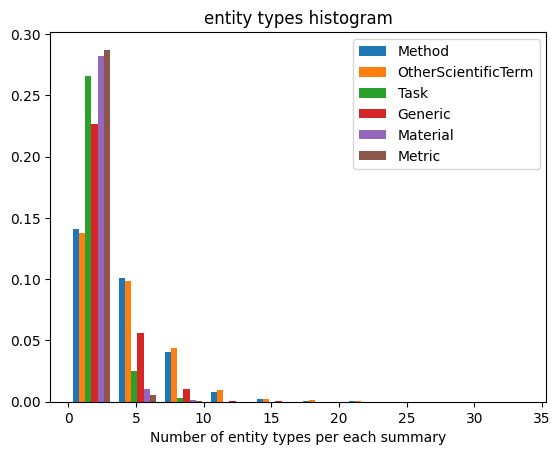

In [106]:
def hist_graph(df, cols, name_count):
    fig, ax = plt.subplots()
    ent_max = max([df[col].max() for col in cols]) 

    ax.hist(df[cols], density=True, histtype='bar', label=cols)
    ax.legend(prop={'size': 10})

    ax.set_xlabel(f"Number of {name_count} per each summary")
    ax.set_title(f"{name_count} histogram")

hist_graph(ent_stat_df, ent_types, name_count="entity types")

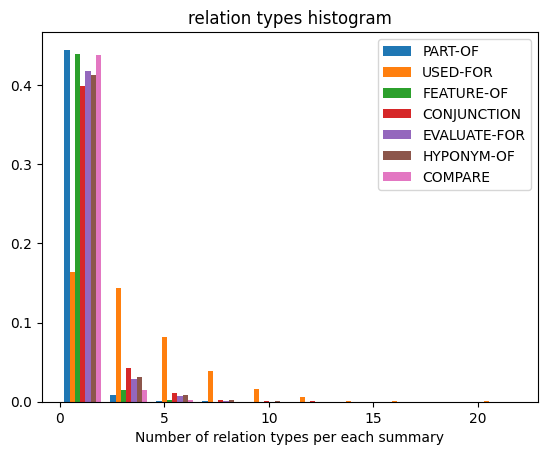

In [107]:
hist_graph(rel_stat_df, rel_types, name_count="relation types")

# Get sequence of triple

## Abstract

In [312]:
def getDataset(section, data_split):
    filepath = getPath(section, data_split)
    with open(filepath, 'r') as json_file:
        json_list = list(json_file)
    return [json.loads(json_str) for json_str in json_list]
dataset_abs = getDataset("abstract", "train")

In [327]:
def getTripSeq(data, sym=True, incFreeEnt=True):
    sym_rel = ['CONJUNCTION', 'COMPARE']
    all_sentences = [j for i in data["sentences"] for j in i]
    flatten_ner = [j for i in data["predicted_ner"] for j in i]
    flatten_re  = [j for i in data["predicted_re"] for j in i[1]]
    seqTrip = ""
    tripEnt = []
    for rel in flatten_re:
        s = " ".join(all_sentences[rel[0][0]:(rel[0][1]+1)])
        o = " ".join(all_sentences[rel[1][0]:(rel[1][1]+1)])
        p = rel[2]
        seqTrip += f"{s} {p} {o}. "
        if sym and p in sym_rel:
            seqTrip += f"{o} {p} {s}. "
        if incFreeEnt:
            if s not in tripEnt: tripEnt.append(s)
            if o not in tripEnt: tripEnt.append(o)
    if incFreeEnt:
        allEnt = []
        for ner in flatten_ner:
            ent = " ".join(all_sentences[ner[0]:ner[1]+1])
            if ent not in allEnt: allEnt.append(ent)
        freeEnt = allEnt.copy()
        for ent in tripEnt: freeEnt.remove(ent)
        if len(freeEnt) != 0: seqTrip += f"Others entities are {' ,'.join(freeEnt)}."
    return seqTrip

In [288]:
a = getTripSeq(dataset_abs[1])

In [303]:
import spacy
nlp = spacy.load("en_core_web_sm")

def getTokenLen(input_text):
    doc_text = nlp(input_text)
    return sum([len(sent) for sent in doc_text.sents])

In [304]:
def getProcessedLen(dataset):
    col = ["paper_id", "original", "triple", "original_len", "triple_len", "diff"]
    len_df = pd.DataFrame(columns=col)
    len_dataset = len(dataset)
    for i, data in enumerate(dataset):
        data['triple_seq'] = getTripSeq(data)
        paper_id = data['doc_key']
        original = [j for i in data["sentences"] for j in i]
        triple = (data['triple_seq'])
        row = pd.DataFrame([[
            paper_id,
            " ".join(original),
            triple,
            len(original), 
            getTokenLen(triple), 
            len(original)-getTokenLen(triple)
        ]],columns=col)
        len_df = pd.concat([len_df, row], axis=0)
        print_progress(i, len_dataset, 'Processing ')
    return len_df.convert_dtypes()

In [305]:
len_abs_df = getProcessedLen(dataset_abs)

Processing [==================================================] 8379/8379


<AxesSubplot:ylabel='Density'>

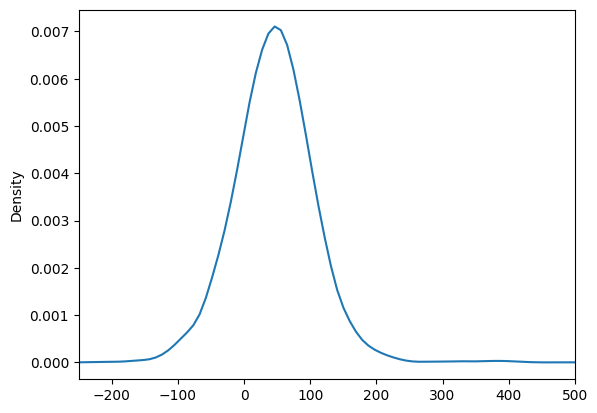

In [292]:
fig, ax = plt.subplots()
len_abs_df['diff'].plot(kind='density', ax=ax, xlim=[-250, 500])

In [295]:
len_abs_df.describe().loc[["max", "mean", "min"]]

,original_len,triple_len,diff
max,7819.000000,3334.000000,4485.00000
mean,208.778494,162.242034,46.53646
min,14.000000,4.000000,-240.00000


In [301]:
print(len_abs_df[len_abs_df["triple_len"]==4]["triple"][0])

Others entities are .


In [168]:
(len_abs_df[len_abs_df["original_len"]==7819])

,paper_id,original,triple,original_len,triple_len,diff,diff_percent
0,SP:1ccd6cfc6dce5a3f4b0c65dd1625f71ac3225c2d,We show how feature maps in convolutional netw...,feature maps PART-OF convolutional networks. s...,7819,2938,4881,0.624249


In [171]:
def calPercDiff(row):
    return (row['original_len']-row['triple_len'])/row['original_len']*100

len_abs_df["diff_percent"] = len_abs_df.apply(lambda row: calPercDiff(row), axis=1)
len_abs_df

,paper_id,original,triple,original_len,triple_len,diff,diff_percent
0,SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc,We study the average CVloo stability of kernel...,average CVloo stability FEATURE-OF kernel ridg...,93,38,55,59.139785
0,SP:b80bc890180934092cde037b49d94d6e4e06fad9,The use of episodic memories in continual lear...,episodic memories USED-FOR catastrophic forget...,148,118,30,20.270270
0,SP:09f2fe6a482bbd6f9bd2c62aa841f995171ba939,Existing Multi - Task Learning(MTL ) strategie...,shared learning USED-FOR Multi - Task Learning...,293,345,-52,-17.747440
0,SP:a1e2218e6943bf138aeb359e23628676b396ed66,This paper deals with the fuel optimization pr...,fuel optimization problem USED-FOR hybrid elec...,224,284,-60,-26.785714
0,SP:43e525fb3fa611df7fd44bd3bc9843e57b154c66,Our work is concerned with the generation and ...,RNA HYPONYM-OF genetic macromolecule. graph - ...,199,150,49,24.623116
...,...,...,...,...,...,...,...
0,SP:0d872fb4321f3a4a3fc61cf4d33b0c7e33f2d695,Discovering the underlying mathematical expres...,deep learning approaches USED-FOR symbolic reg...,178,115,63,35.393258
0,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,Some conventional transforms such as Discrete ...,Discrete Walsh - Hadamard Transform ( DWHT ) C...,198,226,-28,-14.141414
0,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,Some conventional transforms such as Discrete ...,Discrete Walsh - Hadamard Transform ( DWHT ) C...,198,226,-28,-14.141414
0,SP:63ad3be1dae7ede5c02a847304072c1cbc91b1cb,"Thanks to graph neural networks ( GNNs ) , sem...",graph neural networks ( GNNs ) USED-FOR semi -...,220,236,-16,-7.272727


In [175]:
len_abs_df_filt = len_abs_df[len_abs_df["triple_len"]>0]
len_abs_df_filt

,paper_id,original,triple,original_len,triple_len,diff,diff_percent
0,SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc,We study the average CVloo stability of kernel...,average CVloo stability FEATURE-OF kernel ridg...,93,38,55,59.139785
0,SP:b80bc890180934092cde037b49d94d6e4e06fad9,The use of episodic memories in continual lear...,episodic memories USED-FOR catastrophic forget...,148,118,30,20.270270
0,SP:09f2fe6a482bbd6f9bd2c62aa841f995171ba939,Existing Multi - Task Learning(MTL ) strategie...,shared learning USED-FOR Multi - Task Learning...,293,345,-52,-17.747440
0,SP:a1e2218e6943bf138aeb359e23628676b396ed66,This paper deals with the fuel optimization pr...,fuel optimization problem USED-FOR hybrid elec...,224,284,-60,-26.785714
0,SP:43e525fb3fa611df7fd44bd3bc9843e57b154c66,Our work is concerned with the generation and ...,RNA HYPONYM-OF genetic macromolecule. graph - ...,199,150,49,24.623116
...,...,...,...,...,...,...,...
0,SP:0d872fb4321f3a4a3fc61cf4d33b0c7e33f2d695,Discovering the underlying mathematical expres...,deep learning approaches USED-FOR symbolic reg...,178,115,63,35.393258
0,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,Some conventional transforms such as Discrete ...,Discrete Walsh - Hadamard Transform ( DWHT ) C...,198,226,-28,-14.141414
0,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,Some conventional transforms such as Discrete ...,Discrete Walsh - Hadamard Transform ( DWHT ) C...,198,226,-28,-14.141414
0,SP:63ad3be1dae7ede5c02a847304072c1cbc91b1cb,"Thanks to graph neural networks ( GNNs ) , sem...",graph neural networks ( GNNs ) USED-FOR semi -...,220,236,-16,-7.272727


In [178]:
len_abs_df_filt.describe().loc[["max", "mean", "min"]]

,original_len,triple_len,diff,diff_percent
max,7819.000000,2938.000000,4881.0000,95.813953
mean,211.380278,143.559478,67.8208,30.813316
min,14.000000,7.000000,-231.0000,-161.000000


In [184]:
for triple in (len_abs_df_filt[len_abs_df_filt["diff_percent"]>95])["triple"]:
    print(triple, "\n")

selective classification PART-OF online learning model.  

selective classification PART-OF online learning model.  

selective classification PART-OF online learning model.  

convergence regimes FEATURE-OF algorithms.  

convergence regimes FEATURE-OF algorithms.  



In [193]:
len_abs_df_filt[len_abs_df_filt["diff_percent"]>95]

,paper_id,original,triple,original_len,triple_len,diff,diff_percent
0,SP:5555557cae004b0c784305bc3a9d25801bdbe7f7,Motivated by applications to resource - limite...,selective classification PART-OF online learni...,215,9,206,95.813953
0,SP:5555557cae004b0c784305bc3a9d25801bdbe7f7,Motivated by applications to resource - limite...,selective classification PART-OF online learni...,215,9,206,95.813953
0,SP:5555557cae004b0c784305bc3a9d25801bdbe7f7,Motivated by applications to resource - limite...,selective classification PART-OF online learni...,215,9,206,95.813953
0,SP:b9eff5f0e2d89e5074e564fcbe7b0183c8c4818b,In environments with continuous state and acti...,convergence regimes FEATURE-OF algorithms.,157,7,150,95.541401
0,SP:b9eff5f0e2d89e5074e564fcbe7b0183c8c4818b,In environments with continuous state and acti...,convergence regimes FEATURE-OF algorithms.,157,7,150,95.541401


In [191]:
for i, (o,t) in (len_abs_df_filt[len_abs_df_filt["diff_percent"]>95])[["original", "triple"]].iterrows():
    print("Original:\n", o)
    print("Triples:\n", t)
    break
    

Original:
 Motivated by applications to resource - limited and safety - critical domains , we study selective classification in the online learning model , wherein a predictor may abstain from classifying an instance . For example , this may model an adaptive decision to invoke more resources on this instance . Two salient aspects of the setting we consider are that the data may be non - realisable , due to which abstention may be a valid long - term action , and that feedback is only received when the learner abstains , which models the fact that reliable labels are only available when the resource intensive processing is invoked . Within this framework , we explore strategies that make few mistakes , while not abstaining too many times more than the best - in - hindsight error - free classifier from a given class . That is , the one that makes no mistakes , while abstaining the fewest number of times . We construct simple versioning - based schemes for any μ ∈ ( 0 , 1 ] , that make m

## Class

In [328]:
class tripStat:
    def __init__(self, section, data_split):
        self.section = section
        self.data_split = data_split
        self.dataset = getDataset(self.section, self.data_split)
        self.df = getProcessedLen(self.dataset)
        self.df["diff_percent"] = self.df.apply(lambda row: calPercDiff(row), axis=1)

    def showDist(self, show=["diff_percent"]):
        fig, ax = plt.subplots()
        for col in show:
            self.df[col].plot(kind='density', ax=ax)
            
    def describe(self):
        return self.df.describe().loc[["max", "mean", "min"]]


## Summary

Processing [==================================================] 3604/3604


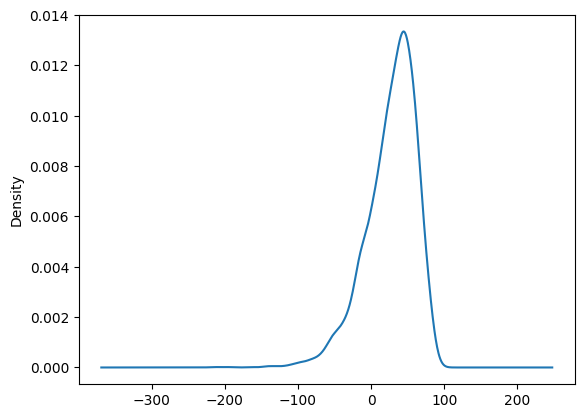

In [329]:
stat_sum_train = tripStat("summary", "val")
stat_sum_train.showDist()

In [325]:
stat_sum_train.describe()

,original_len,triple_len,diff,diff_percent
max,801.000000,412.000000,604.000000,93.678161
mean,119.783019,83.158713,36.624306,26.877910
min,27.000000,5.000000,-190.000000,-214.772727


In [335]:
lowest_trip = stat_sum_train.df[stat_sum_train.df["triple_len"]==5]
lowest_trip

,paper_id,original,triple,original_len,triple_len,diff,diff_percent
0,SP:7bee8d65c68765cbfe38767743fec27981879d34,Experiments are convincing . The provided code...,Others entities are NTK.,30,5,25,83.333333


In [336]:
lowest_trip["original"][0]

'Experiments are convincing . The provided code is helpful for researchers who need a fast computation of NTK . Though the ideological ( mathematical part ) is very simple .'

In [337]:
lowest_trip["triple"][0]

'Others entities are NTK.'

## First section

In [213]:
filepath = getPath("section_1", "val")
print(filepath)
with open(filepath, 'r') as json_file:
    json_list = list(json_file)
dataset_sec1 = [json.loads(json_str) for json_str in json_list]

_scire_models/section_1/val_re.json


In [215]:
dataset_sec1

[]

In [206]:
len_sum_df = getProcessedLen(dataset_sum)

Processing [==================================================] 18934/18934


In [210]:
len_sum_df = len_sum_df.convert_dtypes()
len_sum_df["diff_percent"] = len_sum_df.apply(lambda row: calPercDiff(row), axis=1)
len_sum_df.describe().loc[["max", "mean", "min"]]

,original_len,triple_len,diff,diff_percent
max,1210.000000,842.000000,1056.000000,100.000000
mean,118.182001,72.080754,46.101246,35.738162
min,24.000000,0.000000,-258.000000,-151.515152


## Summary

In [205]:
filepath = getPath("summary", "train")
with open(filepath, 'r') as json_file:
    json_list = list(json_file)
dataset_sum = [json.loads(json_str) for json_str in json_list]

In [206]:
len_sum_df = getProcessedLen(dataset_sum)

Processing [==================================================] 18934/18934


In [210]:
len_sum_df = len_sum_df.convert_dtypes()
len_sum_df["diff_percent"] = len_sum_df.apply(lambda row: calPercDiff(row), axis=1)
len_sum_df.describe().loc[["max", "mean", "min"]]

,original_len,triple_len,diff,diff_percent
max,1210.000000,842.000000,1056.000000,100.000000
mean,118.182001,72.080754,46.101246,35.738162
min,24.000000,0.000000,-258.000000,-151.515152
